In [1]:
import geopandas as gpd
import numpy as np
from shapely.geometry import Polygon, box

In [22]:
df = gpd.read_file("../results/results/test_results.shp", )
coastline = gpd.read_file("../data/coastline.shp")

In [23]:
df

,index,confidence,geometry
0,0,0.266870,"POLYGON ((492429.046 4335291.452, 492470.487 4..."
1,1,0.100489,"POLYGON ((492465.230 4335289.735, 492502.250 4..."
2,2,0.150893,"POLYGON ((492428.686 4335263.633, 492470.383 4..."
3,3,0.275458,"POLYGON ((492490.335 4335291.323, 492532.556 4..."
4,4,0.107227,"POLYGON ((492533.058 4335289.428, 492570.059 4..."
...,...,...,...
4132,4132,0.185138,"POLYGON ((512627.952 4353030.770, 512647.693 4..."
4133,4133,0.128300,"POLYGON ((512625.626 4352898.181, 512651.247 4..."
4134,4134,0.107785,"POLYGON ((512627.209 4352851.463, 512649.809 4..."
4135,4135,0.106142,"POLYGON ((512625.499 4352830.580, 512651.224 4..."


In [24]:
# removes polygons outside the coastline
df = df.loc[df.within(coastline.loc[0, "geometry"])]

In [25]:
df

,index,confidence,geometry
2038,2038,0.264286,"POLYGON ((498662.391 4352494.472, 498670.302 4..."
2039,2039,0.139845,"POLYGON ((498661.920 4352488.472, 498670.473 4..."
2103,2103,0.242154,"POLYGON ((498699.356 4352802.313, 498708.708 4..."
2104,2104,0.331996,"POLYGON ((498709.147 4352735.498, 498718.008 4..."
2105,2105,0.375806,"POLYGON ((498696.330 4352671.340, 498713.147 4..."
...,...,...,...
4124,4124,0.360763,"POLYGON ((512560.531 4353124.049, 512568.878 4..."
4125,4125,0.321465,"POLYGON ((512633.415 4353659.208, 512643.444 4..."
4126,4126,0.349446,"POLYGON ((512635.210 4353594.131, 512643.257 4..."
4127,4127,0.343794,"POLYGON ((512629.166 4353570.867, 512636.235 4..."


In [26]:
# merge overlapping polygons originated from the windowed images
merged = gpd.GeoDataFrame(geometry=list(df.unary_union))
merged['polyID'] = merged.index
points = df.copy()
points['geometry'] =points['geometry'].centroid
df = gpd.sjoin(merged.set_crs(points.crs), points, op='contains')

df = df.dissolve(by='polyID', aggfunc='mean')

df = df.drop(["index_right", "index"], axis=1)

res_bbox = df.copy()
res_bbox["geometry"] = res_bbox.geometry.apply(lambda x: box(*x.bounds))
res_bbox = res_bbox.set_crs(df.crs)

In [27]:
df

,geometry,confidence
polyID,,
0,"POLYGON ((504153.298 4346544.669, 504157.090 4...",0.141959
1,"POLYGON ((502932.949 4348623.901, 502936.377 4...",0.111056
2,"POLYGON ((503238.407 4349089.416, 503238.407 4...",0.149852
3,"POLYGON ((505095.283 4349225.039, 505095.283 4...",0.334212
4,"POLYGON ((503841.121 4349380.561, 503881.352 4...",0.122452
...,...,...
733,"POLYGON ((512524.011 4353355.515, 512533.137 4...",0.264853
734,"POLYGON ((504360.703 4353367.553, 504360.915 4...",0.246031
735,"POLYGON ((498797.146 4352773.871, 498799.791 4...",0.149733


In [28]:
truth = gpd.read_file("../data/test_bbox_rev.shp")

In [29]:
truth

,MAPA,DELEGACIO,MUNICIPIO,MASA,PARCELA,HOJA,TIPO,CONSTRU,COORX,COORY,...,CONTROL,REFCAT,layer,path,width,height,area_1,perimeter,area_2,geometry
0,7016.0,7.0,13.0,017,00012,07013A,R,PI,500103.51,4353552.89,...,None,07013A01700012,campos_r,/home/biel/Documents/Master/TFM/cadastre/extra...,12.0800,9.2700,111.981600,42.700,14.0800,"POLYGON ((500097.106 4353547.872, 500097.106 4..."
1,7045.0,7.0,57.0,0001,034,00ED15A,D,PI,510662.84,4351960.40,...,None,000103400ED15A,santanyi_r,/home/biel/Documents/Master/TFM/cadastre/extra...,10.1000,10.9600,110.696000,42.120,12.1000,"POLYGON ((510656.790 4351953.920, 510656.790 4..."
2,7045.0,7.0,57.0,0001,044,00ED15A,D,PI,510445.68,4352158.87,...,None,000104400ED15A,santanyi_r,/home/biel/Documents/Master/TFM/cadastre/extra...,13.0972,14.1153,184.870907,54.425,15.0972,"POLYGON ((510437.941 4352150.659, 510437.941 4..."
3,7045.0,7.0,57.0,003,00418,07057A,R,PI,511570.07,4353834.66,...,None,07057A00300418,santanyi_r,/home/biel/Documents/Master/TFM/cadastre/extra...,3.3900,3.3800,11.458200,13.540,5.3900,"POLYGON ((511567.360 4353832.060, 511567.360 4..."
4,7045.0,7.0,57.0,003,00435,07057A,R,PI,511946.98,4353569.72,...,None,07057A00300435,santanyi_r,/home/biel/Documents/Master/TFM/cadastre/extra...,8.1600,4.7700,38.923200,25.860,10.1600,"POLYGON ((511941.730 4353565.940, 511941.730 4..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
587,NaN,NaN,NaN,None,None,None,None,None,NaN,NaN,...,None,None,postproc,None,NaN,NaN,NaN,NaN,NaN,"POLYGON ((508556.945 4353362.787, 508556.945 4..."
588,NaN,NaN,NaN,None,None,None,None,None,NaN,NaN,...,None,None,postproc,None,NaN,NaN,NaN,NaN,NaN,"POLYGON ((510737.099 4352243.888, 510737.099 4..."
589,NaN,NaN,NaN,None,None,None,None,None,NaN,NaN,...,None,None,postproc,None,NaN,NaN,NaN,NaN,NaN,"POLYGON ((511095.209 4352640.951, 511095.209 4..."
590,NaN,NaN,NaN,None,None,None,None,None,NaN,NaN,...,None,None,postproc,None,NaN,NaN,NaN,NaN,NaN,"POLYGON ((511560.777 4352172.515, 511560.777 4..."


<AxesSubplot:>

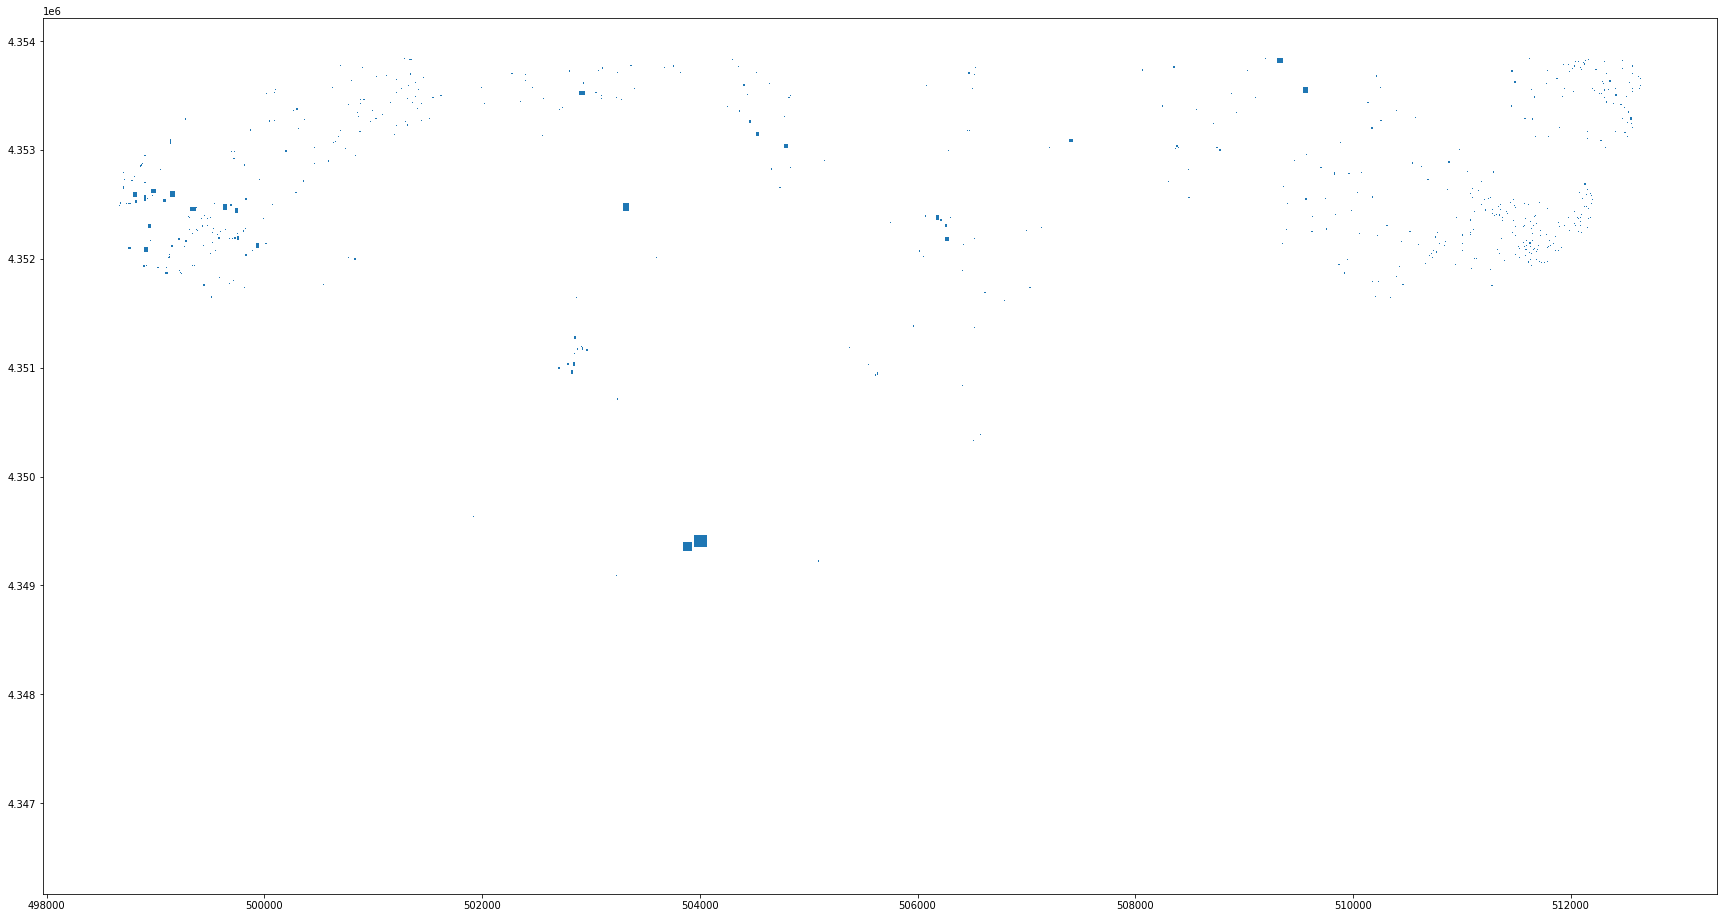

In [30]:
res_bbox.plot(figsize=(30,30))

In [31]:
gpd.overlay(res_bbox, truth)

,confidence,MAPA,DELEGACIO,MUNICIPIO,MASA,PARCELA,HOJA,TIPO,CONSTRU,COORX,...,CONTROL,REFCAT,layer,path,width,height,area_1,perimeter,area_2,geometry
0,0.334212,7045.0,7.0,57.0,006,00001,07057A,R,PI,505088.98,...,None,07057A00600001,santanyi_r,/home/biel/Documents/Master/TFM/cadastre/extra...,13.2400,12.95000,171.458000,52.3800,15.2400,"POLYGON ((505096.250 4349217.633, 505082.458 4..."
1,0.288953,7045.0,7.0,57.0,006,00176,07057A,R,PI,506510.43,...,None,07057A00600176,santanyi_r,/home/biel/Documents/Master/TFM/cadastre/extra...,8.0500,4.10000,33.005000,24.3000,10.0500,"POLYGON ((506522.212 4350329.511, 506511.701 4..."
2,0.253999,7045.0,7.0,57.0,006,00066,07057A,R,PI,506414.18,...,None,07057A00600066,santanyi_r,/home/biel/Documents/Master/TFM/cadastre/extra...,5.0500,9.87000,49.843500,29.8400,7.0500,"POLYGON ((506413.479 4350833.155, 506407.985 4..."
3,0.314654,7045.0,7.0,57.0,006,00072,07057A,R,PI,505612.98,...,None,07057A00600072,santanyi_r,/home/biel/Documents/Master/TFM/cadastre/extra...,7.6340,12.64900,96.562466,40.5660,9.6340,"POLYGON ((505616.948 4350927.309, 505609.181 4..."
4,0.174339,7045.0,7.0,57.0,006,00153,07057A,R,PI,506524.22,...,None,07057A00600153,santanyi_r,/home/biel/Documents/Master/TFM/cadastre/extra...,7.9619,8.33045,66.326210,32.5847,9.9619,"POLYGON ((506528.148 4351363.377, 506520.335 4..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,0.311874,7057.0,7.0,57.0,20406,05,ED1523N,U,PI,512086.96,...,None,2040605ED1523N,santanyi_u,/home/biel/Documents/Master/TFM/cadastre/extra...,7.3300,8.82000,64.650600,32.3000,9.3300,"POLYGON ((512092.280 4353757.359, 512084.988 4..."
537,0.238211,7107.0,7.0,59.0,009,00011,07059A,R,PI,503673.38,...,None,07059A00900011,sessalines_r,/home/biel/Documents/Master/TFM/cadastre/extra...,6.3900,8.51000,54.378900,29.8000,8.3900,"POLYGON ((503677.402 4353757.583, 503670.255 4..."
538,0.264853,7057.0,7.0,57.0,25357,01,ED1523N,U,PI,512526.88,...,None,2535701ED1523N,santanyi_u,/home/biel/Documents/Master/TFM/cadastre/extra...,9.6400,13.27000,127.922800,45.8200,11.6400,"POLYGON ((512533.137 4353341.981, 512524.011 4..."
539,0.246031,7107.0,7.0,59.0,008,00287,07059A,R,PI,504366.48,...,None,07059A00800287,sessalines_r,/home/biel/Documents/Master/TFM/cadastre/extra...,10.6400,14.72950,156.721880,50.7390,12.6400,"POLYGON ((504370.950 4353352.838, 504360.703 4..."


In [32]:
overlaps = gpd.sjoin(res_bbox, truth)

<AxesSubplot:>

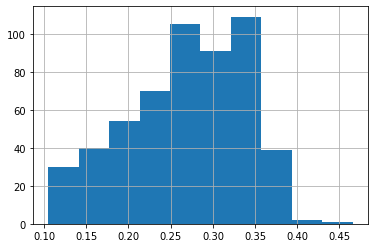

In [33]:
res_bbox.loc[overlaps.index]["confidence"].hist()

<AxesSubplot:>

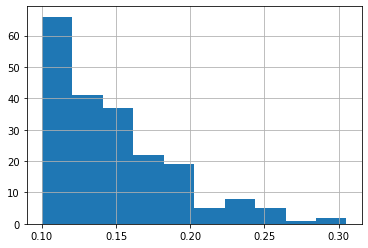

In [34]:
res_bbox.loc[~res_bbox.index.isin(overlaps.index)]["confidence"].hist()

In [35]:
res_bbox.loc[overlaps.index]

,geometry,confidence
polyID,,
3,"POLYGON ((505096.351 4349217.633, 505096.351 4...",0.334212
8,"POLYGON ((506522.212 4350329.511, 506522.212 4...",0.288953
11,"POLYGON ((506413.479 4350833.155, 506413.479 4...",0.253999
12,"POLYGON ((505616.948 4350927.309, 505616.948 4...",0.314654
28,"POLYGON ((506528.148 4351363.377, 506528.148 4...",0.174339
...,...,...
729,"POLYGON ((512092.280 4353757.359, 512092.280 4...",0.311874
730,"POLYGON ((503677.402 4353757.583, 503677.402 4...",0.238211
733,"POLYGON ((512533.137 4353341.981, 512533.137 4...",0.264853


In [44]:
res_bbox.shape[0]

738

In [45]:
res_bbox.loc[~res_bbox.index.isin(overlaps.index)].shape[0]

206

In [46]:
res_bbox.loc[~res_bbox.index.isin(overlaps.index)].to_file("../results/hard_negative.geojson", driver='GeoJSON')

In [47]:
738 - 237

501

In [48]:
res_bbox.loc[overlaps.index].to_file("../results/hard_posotive.geojson", driver='GeoJSON')

In [49]:
truth.shape[0]

592

In [50]:
1 - 206/738

0.7208672086720866